# Гипергеометрическое распределение

### Создадим массив с объёмами реализаций выборок

In [87]:
volumes = [5, 10, 100, 1000, 10**5]

In [88]:
count_samples = 5

### Зададим гипергеометрическое распределение $HG(200, 70, 10)$ используя модуль Scipy [1] и выведём первые 2 реализации выборки

In [89]:
from scipy.stats import hypergeom
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
N, M, n = (200, 70, 10)
hg = hypergeom(N, n, M)

In [90]:
data = {v: np.array([hg.rvs(size=v) for _ in range(count_samples)]) for v in volumes}

In [91]:
print(data[5])

[[3 4 5 3 5]
 [6 4 4 2 6]
 [2 3 4 4 5]
 [1 0 5 2 3]
 [3 3 2 5 5]]


In [92]:
print(data[10])

[[5 3 3 6 2 4 2 3 6 8]
 [4 5 3 1 2 3 2 4 3 2]
 [5 2 6 5 2 4 0 5 3 5]
 [6 3 1 7 2 5 3 3 4 2]
 [1 6 5 2 4 7 3 3 3 2]]


### Построение эмипирической фунции распределения

In [93]:
def ecdf(x, data):
    return data[data<=x].size / data.size

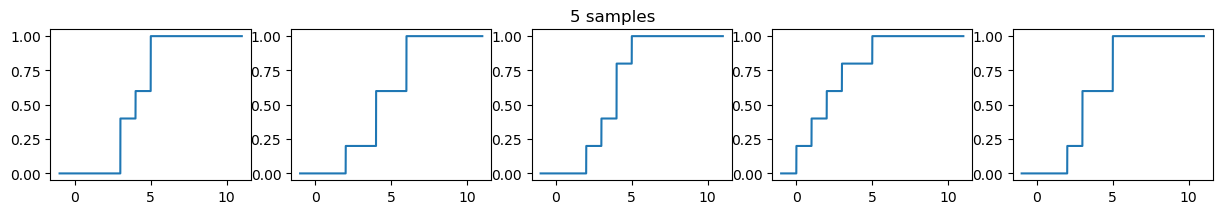

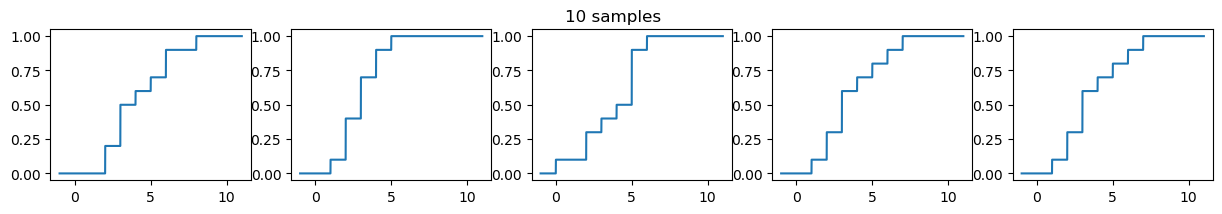

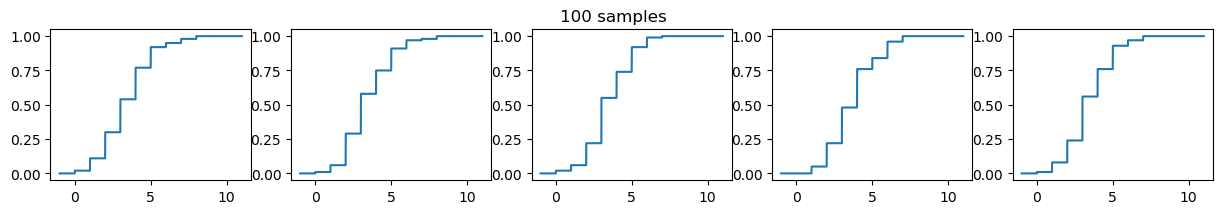

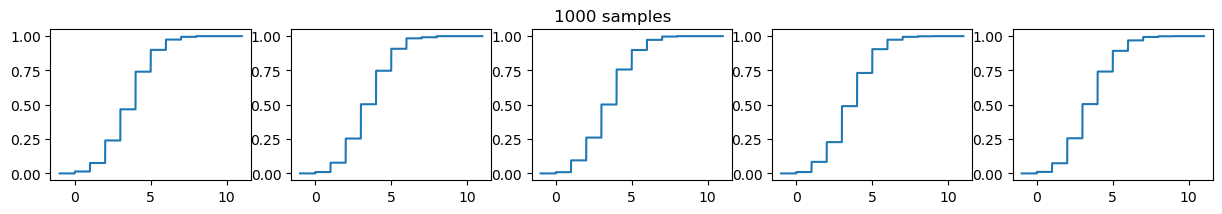

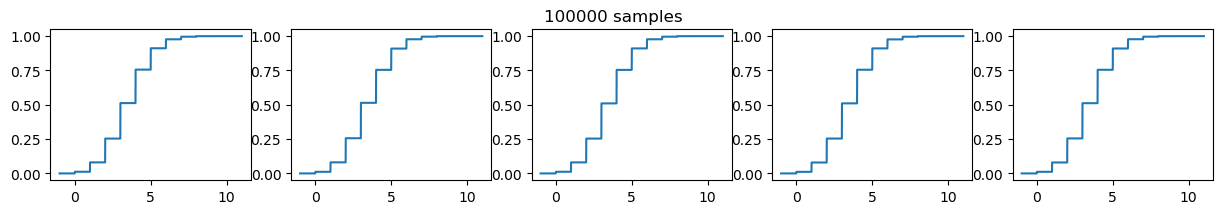

In [94]:
x = np.arange(-1,11, 0.001)
for volume in data:
    fig, ax = plt.subplots(1, 5, figsize=(15, 2), dpi=100)
    fig.suptitle(f"{volume} samples")
    for i in range(len(volumes)):
        y = list(map(lambda e: ecdf(e, data[volume][i]) , x))
        ax[i].plot(x, y)

### Расчёт верхнтх границ разностей каждой пары эмпирических функций распределения

In [182]:
for d in data:
    for i in range(len(data)-1):
        for j in range(i+1, len(data)):
            print(f"{len(d):10} samples, sup|F_{i+1} - F_{j+1}| = {max(list(map(lambda x: abs(ecdf(x,data[i])-ecdf(x,data[j])), d)))}")

         5 samples, sup|F_1 - F_2| = 0.2
         5 samples, sup|F_1 - F_3| = 0.10000000000000003
         5 samples, sup|F_1 - F_4| = 0.12
         5 samples, sup|F_1 - F_5| = 0.14353000000000005
         5 samples, sup|F_2 - F_3| = 0.1499999999999999
         5 samples, sup|F_2 - F_4| = 0.126
         5 samples, sup|F_2 - F_5| = 0.11931000000000001
         5 samples, sup|F_3 - F_4| = 0.04799999999999993
         5 samples, sup|F_3 - F_5| = 0.06247999999999998
         5 samples, sup|F_4 - F_5| = 0.02353000000000005
        10 samples, sup|F_1 - F_2| = 0.0
        10 samples, sup|F_1 - F_3| = 0.09000000000000001
        10 samples, sup|F_1 - F_4| = 0.10800000000000001
        10 samples, sup|F_1 - F_5| = 0.11931000000000001
        10 samples, sup|F_2 - F_3| = 0.09000000000000001
        10 samples, sup|F_2 - F_4| = 0.10800000000000001
        10 samples, sup|F_2 - F_5| = 0.11931000000000001
        10 samples, sup|F_3 - F_4| = 0.04799999999999993
        10 samples, sup|F_3 - F_5| =

### Построение вариациооного ряда и поиск квантилей

In [95]:
alphas = [0.1, 0.5, 0.7]

In [96]:
var = {key: np.array([(sorted(v)) for v in value]) for key, value in data.items()}
print(var[5])

[[3 3 4 5 5]
 [2 4 4 6 6]
 [2 3 4 4 5]
 [0 1 2 3 5]
 [2 3 3 5 5]]


In [97]:
print(var[10])

[[2 2 3 3 3 4 5 6 6 8]
 [1 2 2 2 3 3 3 4 4 5]
 [0 2 2 3 4 5 5 5 5 6]
 [1 2 2 3 3 3 4 5 6 7]
 [1 2 2 3 3 3 4 5 6 7]]


In [98]:
for a in alphas:
    print(f"α={a}")
    for key, samples in var.items():
        x_alphas = []
        for sample in samples:
            x_alphas += [sample[int(a*len(sample) + 1)]]
            print(f"{key:6} samples, x_α={x_alphas[-1]}")
        av+=x_alphas
        print()
    print()

α=0.1
     5 samples, x_α=3
     5 samples, x_α=4
     5 samples, x_α=3
     5 samples, x_α=1
     5 samples, x_α=3

    10 samples, x_α=3
    10 samples, x_α=2
    10 samples, x_α=2
    10 samples, x_α=2
    10 samples, x_α=2

   100 samples, x_α=2
   100 samples, x_α=2
   100 samples, x_α=2
   100 samples, x_α=2
   100 samples, x_α=2

  1000 samples, x_α=2
  1000 samples, x_α=2
  1000 samples, x_α=2
  1000 samples, x_α=2
  1000 samples, x_α=2

100000 samples, x_α=2
100000 samples, x_α=2
100000 samples, x_α=2
100000 samples, x_α=2
100000 samples, x_α=2


α=0.5
     5 samples, x_α=5
     5 samples, x_α=6
     5 samples, x_α=4
     5 samples, x_α=3
     5 samples, x_α=5

    10 samples, x_α=5
    10 samples, x_α=3
    10 samples, x_α=5
    10 samples, x_α=4
    10 samples, x_α=4

   100 samples, x_α=3
   100 samples, x_α=3
   100 samples, x_α=3
   100 samples, x_α=4
   100 samples, x_α=3

  1000 samples, x_α=4
  1000 samples, x_α=3
  1000 samples, x_α=3
  1000 samples, x_α=4
  1000 samp

### Проверка реального значения квантиля

In [99]:
def compute_quntile(cdf, a, eps=0.001):
    x = np.arange(-1, 13, eps)
    for xx in x:
        if cdf(xx)<a and cdf(xx+eps)>a:
            return int(xx+eps)

for a in alphas:
    x = np.arange(-1, 13, 0.001)
    print(f"α={a}, x_α={compute_quntile(hg.cdf, a)}")

α=0.1, x_α=2
α=0.5, x_α=3
α=0.7, x_α=4


### Построение гистограммы частот, полигона частот и сравнение значений с функцией распределения

Красная линия - линия полигона частот, жёлтая - функция распределения

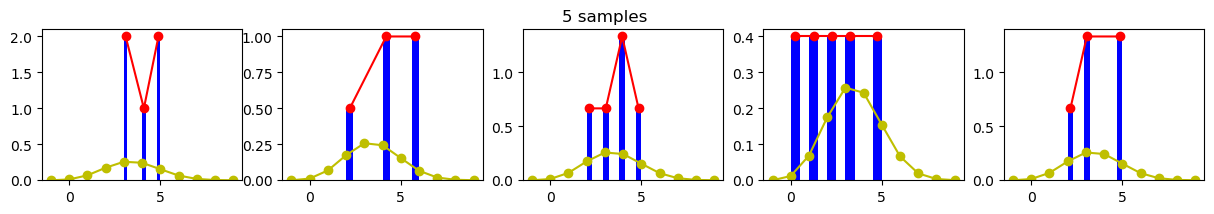

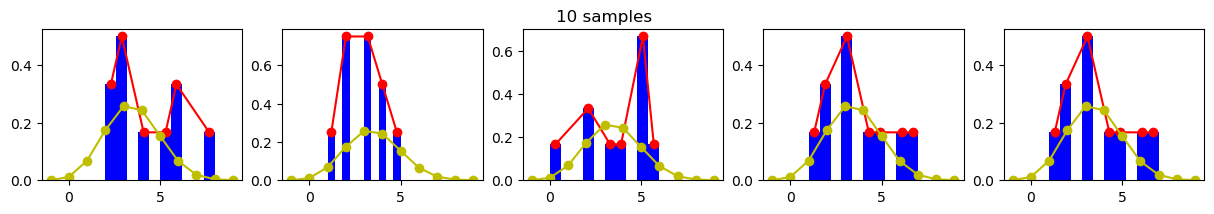

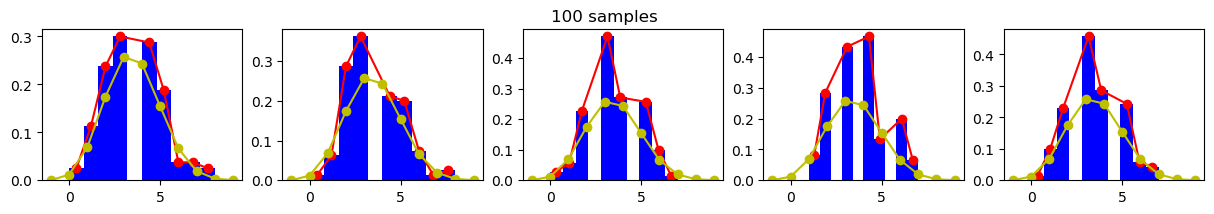

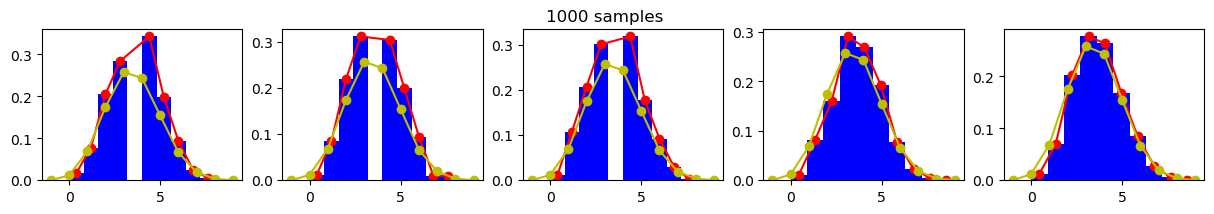

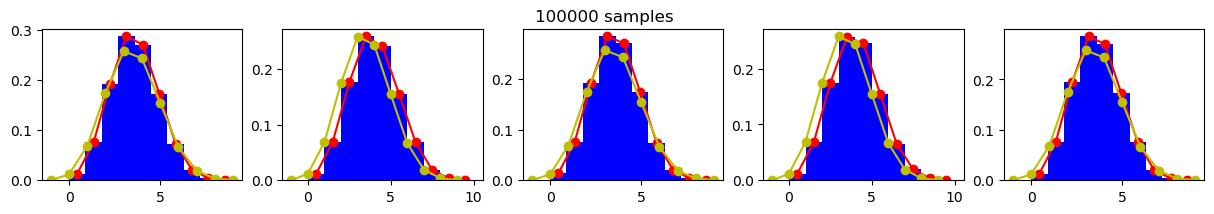

In [100]:
for volume in data:
    fig, ax = plt.subplots(1, 5, figsize=(15, 2), dpi=100)
    fig.suptitle(f"{volume} samples")
    for i in range(len(volumes)):
        counts, bins = np.histogram(data[volume][i])
        ns, bns, _ = ax[i].hist(bins[:-1], bins=bins, weights=counts, density=True, color="b")
        bns = np.array(bns)
        x = bns[:-1] + (bns[1:] - bns[:-1])/2
        x = [x[i] for i in range(len(ns))  if ns[i]!=0 ]
        y = [ns[i] for i in range(len(ns))  if ns[i]!=0 ]
        ax[i].plot(x, y, "-ro")
        x = np.arange(-1, n)
        pmf = hg.pmf(x)
        ax[i].plot(x, pmf, '-yo')
        ax[i].plot   

# Гамма распределение


### Создадим массив с объёмами реализаций выборок

In [1]:
volumes = [5, 10, 100, 1000, 10**5]

In [26]:
count_samples = 5

### Зададим Гамма распределение $Г(2, 1/2)$ используя модуль Scipy и выведём первые 2 реализации выборки

In [101]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma
%matplotlib inline

a, th = 2, 1/2 
g = gamma(a, scale=1/th)

In [102]:
data = {v: np.array([g.rvs(size=v) for _ in range(count_samples)]) for v in volumes}

In [103]:
print(data[5])

[[ 6.77619368  9.70269031  7.5120875   4.33137497  3.83007931]
 [ 1.23450231  3.57772936  0.68889252  6.02369948 14.21263733]
 [ 2.37523017  0.40753215  0.73004279  3.15137536  2.62719512]
 [ 3.69732111  2.81309026  2.90174465  3.75466955  2.45917034]
 [ 2.04520847  1.19490364  1.56233336  3.39755295  4.68764266]]


In [104]:
print(data[10])

[[3.65600182 7.8819721  3.7376996  7.22611238 4.91460389 8.77824309
  6.28645247 1.29723118 4.05529781 4.60604141]
 [3.73792254 1.72582956 3.01393272 2.10576379 0.71052136 1.2781397
  2.92106772 3.47689149 4.20728146 3.92932383]
 [8.59732604 4.4406117  2.41108952 0.74274652 2.96181505 5.84477065
  1.52935483 0.733653   0.56688958 1.17526685]
 [3.2923443  8.44209814 2.96968555 5.37904874 3.86357508 3.88777721
  5.51230633 1.47579574 9.18266716 5.23266115]
 [3.20820001 0.8041775  4.7281571  6.5457508  5.62508416 0.38903744
  2.03403378 0.16417412 5.46829584 3.47990259]]


### Построение эмипирической фунции распределения

In [105]:
def ecdf(x, data):
    return data[data<=x].size / data.size

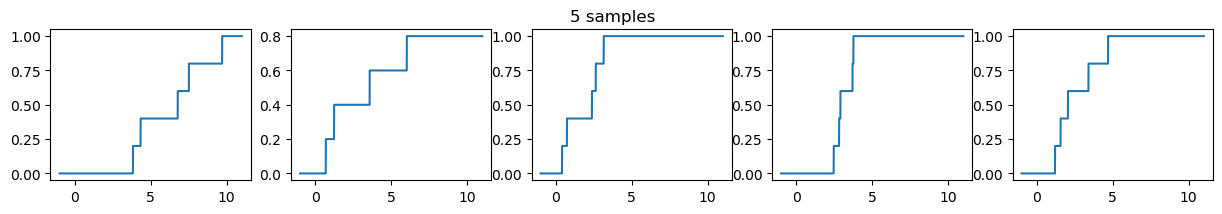

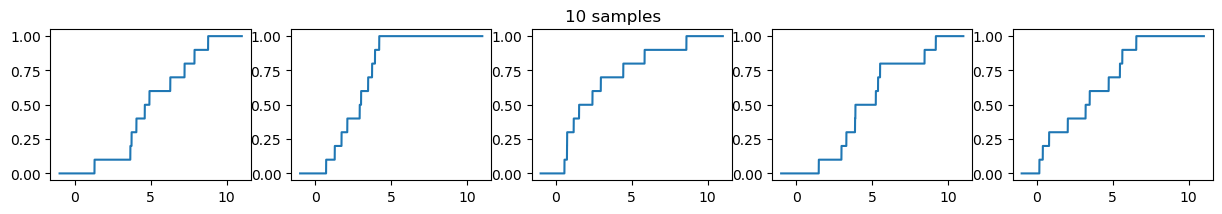

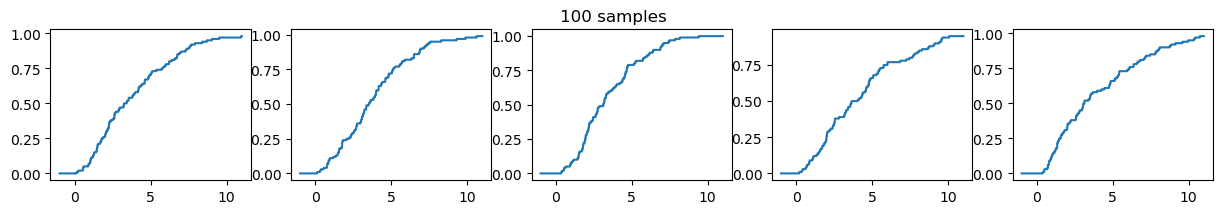

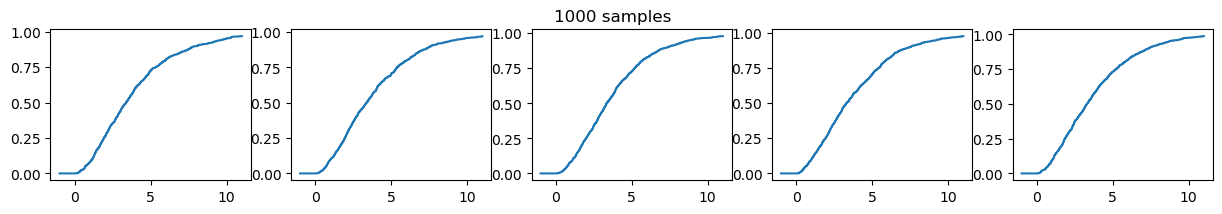

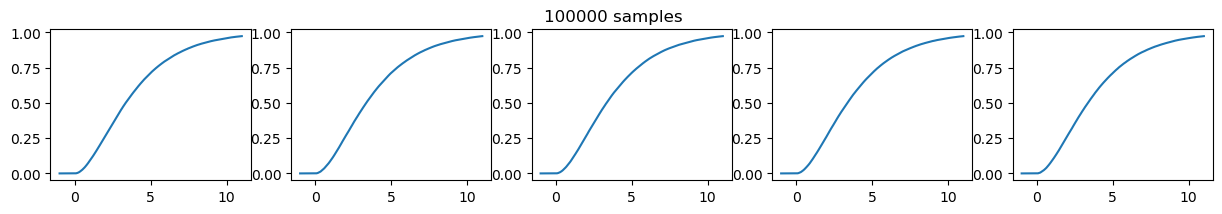

In [107]:
x = np.arange(-1,11, 0.001)
for volume in data:
    fig, ax = plt.subplots(1, 5, figsize=(15, 2), dpi=100)
    fig.suptitle(f"{volume} samples")
    for i in range(len(volumes)):
        y = list(map(lambda e: ecdf(e, data[volume][i]) , x))
        ax[i].plot(x, y)

### Расчёт верхнтх границ разностей каждой пары эмпирических функций распределения

In [193]:
for d in data:
    for i in range(len(data)-1):
        for j in range(i+1, len(data)):
            print(f"{len(d):10} samples, sup|F_{i+1} - F_{j+1}| = {max(list(map(lambda x: abs(ecdf(x,data[i])-ecdf(x,data[j])), d)))}")

         5 samples, sup|F_1 - F_2| = 0.4
         5 samples, sup|F_1 - F_3| = 0.35
         5 samples, sup|F_1 - F_4| = 0.253
         5 samples, sup|F_1 - F_5| = 0.25182000000000004
         5 samples, sup|F_2 - F_3| = 0.36000000000000004
         5 samples, sup|F_2 - F_4| = 0.2290000000000001
         5 samples, sup|F_2 - F_5| = 0.22407
         5 samples, sup|F_3 - F_4| = 0.14799999999999996
         5 samples, sup|F_3 - F_5| = 0.14950000000000002
         5 samples, sup|F_4 - F_5| = 0.0064700000000000035
        10 samples, sup|F_1 - F_2| = 0.6000000000000001
        10 samples, sup|F_1 - F_3| = 0.16999999999999998
        10 samples, sup|F_1 - F_4| = 0.319
        10 samples, sup|F_1 - F_5| = 0.323
        10 samples, sup|F_2 - F_3| = 0.43000000000000005
        10 samples, sup|F_2 - F_4| = 0.281
        10 samples, sup|F_2 - F_5| = 0.277
        10 samples, sup|F_3 - F_4| = 0.14900000000000002
        10 samples, sup|F_3 - F_5| = 0.15300000000000002
        10 samples, sup|F_4 - 

### Построение вариациооного ряда и поиск квантилей

In [108]:
alphas = [0.1, 0.5, 0.7]

In [109]:
var = {key: np.array([(sorted(v)) for v in value]) for key, value in data.items()}
print(var[5])

[[ 3.83007931  4.33137497  6.77619368  7.5120875   9.70269031]
 [ 0.68889252  1.23450231  3.57772936  6.02369948 14.21263733]
 [ 0.40753215  0.73004279  2.37523017  2.62719512  3.15137536]
 [ 2.45917034  2.81309026  2.90174465  3.69732111  3.75466955]
 [ 1.19490364  1.56233336  2.04520847  3.39755295  4.68764266]]


In [110]:
print(var[10])

[[1.29723118 3.65600182 3.7376996  4.05529781 4.60604141 4.91460389
  6.28645247 7.22611238 7.8819721  8.77824309]
 [0.71052136 1.2781397  1.72582956 2.10576379 2.92106772 3.01393272
  3.47689149 3.73792254 3.92932383 4.20728146]
 [0.56688958 0.733653   0.74274652 1.17526685 1.52935483 2.41108952
  2.96181505 4.4406117  5.84477065 8.59732604]
 [1.47579574 2.96968555 3.2923443  3.86357508 3.88777721 5.23266115
  5.37904874 5.51230633 8.44209814 9.18266716]
 [0.16417412 0.38903744 0.8041775  2.03403378 3.20820001 3.47990259
  4.7281571  5.46829584 5.62508416 6.5457508 ]]


In [111]:
for a in alphas:
    print(f"α={a}")
    for key, samples in var.items():
        x_alphas = []
        for sample in samples:
            x_alphas += [sample[int(a*len(sample) + 1)]]
            print(f"{key:6} samples, x_α={x_alphas[-1]}")
        av+=x_alphas
        print()
    print()

α=0.1
     5 samples, x_α=4.331374973576814
     5 samples, x_α=1.2345023050928248
     5 samples, x_α=0.7300427851165165
     5 samples, x_α=2.8130902628516226
     5 samples, x_α=1.5623333606644652

    10 samples, x_α=3.73769959558919
    10 samples, x_α=1.7258295616584616
    10 samples, x_α=0.7427465242243667
    10 samples, x_α=3.292344298400339
    10 samples, x_α=0.8041775040292664

   100 samples, x_α=1.1536988366570513
   100 samples, x_α=1.1745931863883563
   100 samples, x_α=1.4705423257790504
   100 samples, x_α=1.1362580072367043
   100 samples, x_α=0.9558550844493837

  1000 samples, x_α=1.161503581880818
  1000 samples, x_α=1.020115967451667
  1000 samples, x_α=1.1281866247890908
  1000 samples, x_α=1.0071643211873178
  1000 samples, x_α=1.0521906548368076

100000 samples, x_α=1.0587729207648895
100000 samples, x_α=1.0678016038280274
100000 samples, x_α=1.0595519280200374
100000 samples, x_α=1.0664761189477017
100000 samples, x_α=1.061121482830647


α=0.5
     5 samples

### Проверка реального значения квантиля

In [113]:
def compute_quntile(cdf, a, eps=0.001):
    x = np.arange(-1, 13, eps)
    for xx in x:
        if cdf(xx)<a and cdf(xx+eps)>a:
            return xx+eps

for a in alphas:
    x = np.arange(-1, 13, 0.001)
    print(f"α={a}, x_α={compute_quntile(g.cdf, a)}")

α=0.1, x_α=1.0640000000000018
α=0.5, x_α=3.3570000000000033
α=0.7, x_α=4.879000000000006


### Построение гистограммы частот, полигона частот и сравнение значений с функцией распределения

Красная линия - линия полигона частот, жёлтая - функция распределения

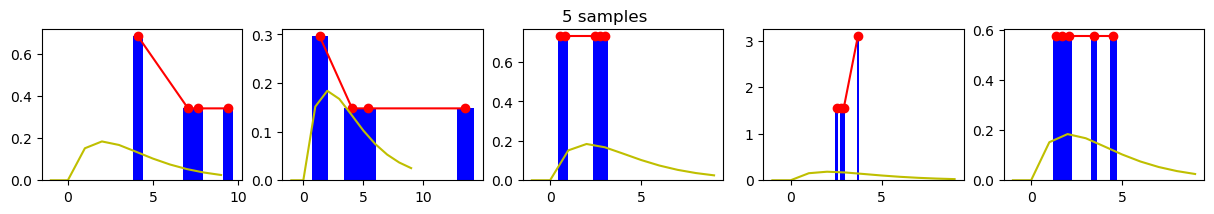

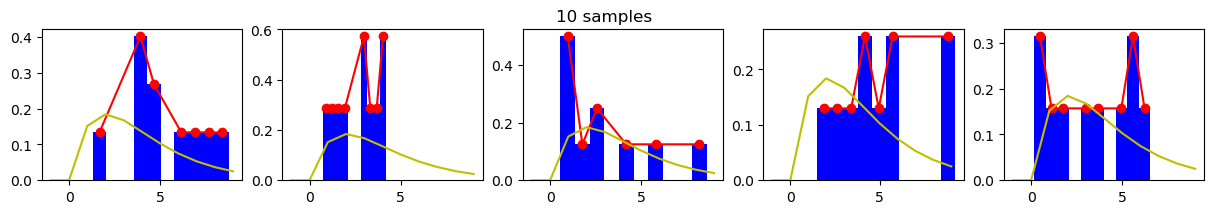

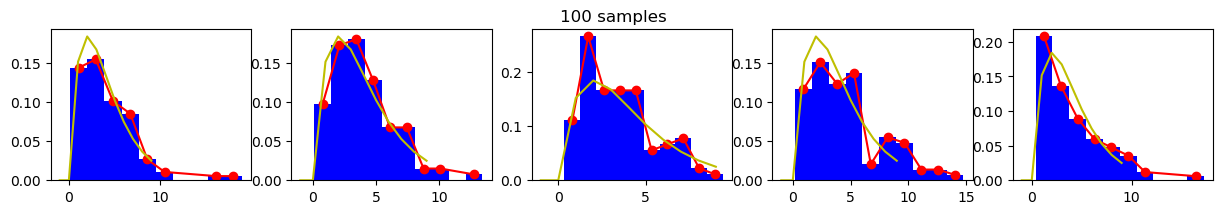

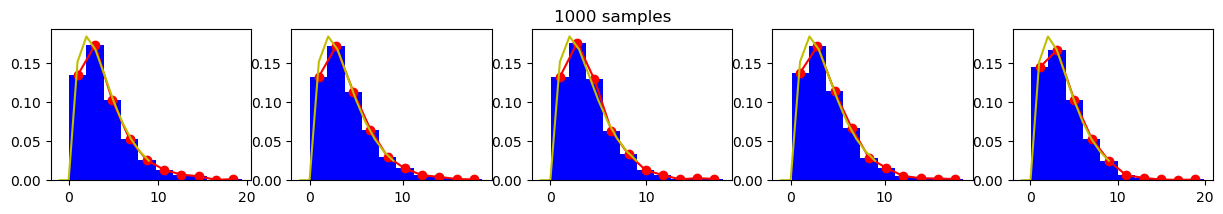

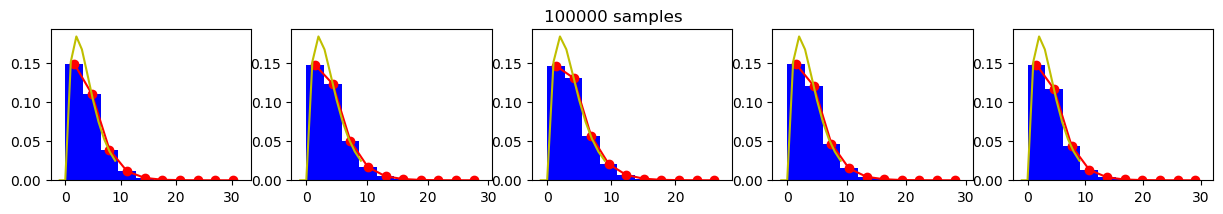

In [117]:
for volume in data:
    fig, ax = plt.subplots(1, 5, figsize=(15, 2), dpi=100)
    fig.suptitle(f"{volume} samples")
    for i in range(len(volumes)):
        counts, bins = np.histogram(data[volume][i])
        ns, bns, _ = ax[i].hist(bins[:-1], bins=bins, weights=counts, density=True, color="b")
        bns = np.array(bns)
        x = bns[:-1] + (bns[1:] - bns[:-1])/2
        x = [x[i] for i in range(len(ns))  if ns[i]!=0 ]
        y = [ns[i] for i in range(len(ns))  if ns[i]!=0 ]
        ax[i].plot(x, y, "-ro")
        x = np.arange(-1, n)
        pdf = g.pdf(x)
        ax[i].plot(x, pdf, '-y')
        ax[i].plot   